
BIENVENIDO AL PROGRAMA DE GRAFICACIÓN
Este programa se encarga de gráficar una serie de puntos e interpolarlos (o unirlos)
mediante el metodo de spline cúbico. Tenga en cuenta que se requieren de por lo men-
os 3 puntos para poder aplicar el método y que si la gráfica es cerrada debe contarse
y repetirse como ultimo punto el mismo punto inicial. Esto quiere decir que, por eje-
mplo, en una figúra cerrada de 7 puntos deben ingresarse 8 puntos, colocando como oc-
tavo punto el mismo punto de partida.

Por otra parte se ha añadido una sección para poder comparar con una función y obten-
er la grafica de error por cada punto, que no es de uso necesario. 


Ingrese el valor de la cantidad de puntos que desea interpolar: 4

Ingrese los dos valores de la coordenada en orden (x,y) y separados
por coma (,) y separando cada coordenada con punto y coma (;):
0.1,-0.62049958;0.2,-0.28398668;0.3,0.00660095;0.4,0.24842440

Si desea comparar el resultado con una función ingrese [1], de lo contrario i

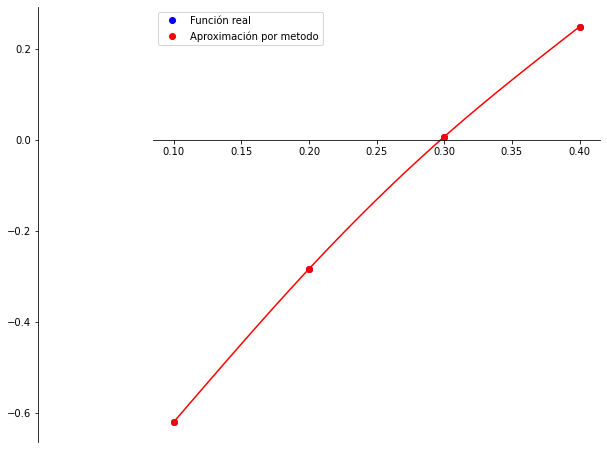

In [1]:
############################## PREAMBULO ##########################################

# Nombre completo: Jhon Sebastián Amaya Salcedo
# Documentos: cc.1052416073
# Fecha: 4 de Noviembre 2020
# Programa: Aproximación a una función
# Metodos: metodo de spline cúbico
# Breve descripción: Encuentra las funciones que aproximan una función entre varios 
#                    intervalos y puntos y, los grafica.

############## librerias ##################
from sympy import solve, symbols, diff, sqrt, S, Interval
from sympy.parsing.sympy_parser import parse_expr
from numpy import matrix, linspace, zeros
from numpy.linalg import solve, det
import pylab as pl

print("""
BIENVENIDO AL PROGRAMA DE GRAFICACIÓN
Este programa se encarga de gráficar una serie de puntos e interpolarlos (o unirlos)
mediante el metodo de spline cúbico. Tenga en cuenta que se requieren de por lo men-
os 3 puntos para poder aplicar el método y que si la gráfica es cerrada debe contarse
y repetirse como ultimo punto el mismo punto inicial. Esto quiere decir que, por eje-
mplo, en una figúra cerrada de 7 puntos deben ingresarse 8 puntos, colocando como oc-
tavo punto el mismo punto de partida.

Por otra parte se ha añadido una sección para poder comparar con una función y obten-
er la grafica de error por cada punto, que no es de uso necesario. 
""")
#####################################################################################
################################### DATOS ###########################################

while True:
    try:
        n = int(input("\nIngrese el valor de la cantidad de puntos que desea interpolar: "))
        if n > 0:
            break
        else:
            print("\nIngrese un valor mayor a cero")
    except:
        print("\nIngrese un valor numérico")
while True:
    try:
        p = matrix(input("\nIngrese los dos valores de la coordenada en orden (x,y) y separados\npor coma (,) y separando cada coordenada con punto y coma (;):\n"))
        if p.shape == (n, 2):
            break
        else:
            print("\nIngrese la cantidad de datos solicitados")

    except:
        print("\nDatos erroneos, vuelva a ingresarlos")

while True:
    des = input("\nSi desea comparar el resultado con una función ingrese [1], de lo contrario ingrese [2]: ")
    if des == "1":
        x = symbols("x")
        print("""
Ingrese la función con la que va a comparar usando x como variable 
independiente y teniendo en cuenta los operadores de la libreria 
Sympy como: producto(*), división(/), exponente(**)...y funciones
como sin(x), cos(x), exp(x), ln(x)...""")
        while True:
            f = parse_expr(input())
            if f.free_symbols == set([x]): # en caso de que se ingresen variables distintas a x o que no sean funciones trascendentales
                break
            else:
                print("Función erronea, revise los operadores y funciones de la libreria")         
        break
    elif des == "2":
        break
    else:
        print("\nIngrese un valor entre 1 y 2")

#####################################################################
############################# CODIGO ################################

A = zeros((4*(n-1),4*(n-1))) 
B = zeros(4*(n-1))

################### ecuaciones de continuidad #######################

h = 0
for i in range(n-1): # n-1 es la cantidad de ecuaciones
    for j in range(2): # se evalua por ambos extremos cada función
        i += j
        for k in range(4): # ecuaciones de grado 3 con 4 coeficientes
            A[i+h,k+(i-j)*4] = p[i,0]**(3-k)
            B[i+h] = p[i,1]
    h+=1

################ ecuaciones de primera derivada #####################

h = 0
for i,l in enumerate(range(2*(n-1),2*(n-1)+n-2)): #2*(n-1) es la cantidad de ecuaciones de continuidad --- n-2 es la cantidad de ecs de primera derivada
    for j in range(2):
        for k in range(3): # ecuaciones de grado 2 tienen 3 coeficientes
            A[l,k+(j+h)*4] = (-1)**(j)*(3-k)*p[1+i,0]**(2-k)
    h+=1

################ ecuaciones de segunda derivada ####################

h = 0
for i,l in enumerate(range(2*(n-1)+n-2, 2*(n-1)+2*(n-2))):
    for j in range(2):
        for k in range(2): # ecuaciones de grado 1 tienen 2 coeficientes
            A[l,k+(j+h)*4] = (-1)**(j)*(2-k)*(3-k)*p[1+i,0]**(1-k)/2
    h+=1

############## ecuaciones de condiciones iniciales #################

h = 0
i = 0

for j in range(2): # 2 puntos extremos de la ecuación
    for k in range(2): # ecuaciones de grado 1 tienen 2 coeficientes
        A[4*(n-1)-2+j,i+k] = (2-k)*(3-k)*p[h,0]**(1-k)/2
    i += 4*(n-2)
    h += n-1

########### Solución del sistema de ecuaciones lineal ##############

if det(A) == 0: ## verifica si la matriz es invertible
    print("""
      
No existe aproximación por el metodo ya que el sistema no tiene solución
Intente con otros puntos.
""")
else:
    C = solve(A,B) ## metodo de Gauss con la libreria Numpy

########################### Gráfica ################################
    
    splines = zeros((n-1,100)) 
    
    if des == "1":
        grafica = zeros(100) # grafica de la función real
        error = zeros(100*(n-1)) # grafica del error
        lims = zeros(100*(n-1)) # arreglo para almacenar las x y poder gráficar el error
    
    pl.figure(figsize=(8,8))
    ax = pl.gca()  # se definen los ejes de la grafica
    
    #### se ponen los ejes centrados 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))    
    
    # gráfica de los puntos

    pl.plot(p[:,0],p[:,1],"bo",label="Función real")   
    pl.plot(p[:,0],p[:,1],"ro",label="Aproximación por metodo")
    
    for i in range(n-1): # n-1 cantidad de ecuaciones 
        lim = linspace(p[i,0],p[i+1,0],100)
        for j,k in enumerate(lim):
            for l in range(4): # 4 coeficientes
                splines[i,j] += C[(i*4)+l]*k**(3-l) 
            
            if des == "1":
                grafica[j] = f.evalf(subs={x:k}) # evaluar la función
                lims[100*i+j] = k
                error[100*i+j] = abs(splines[i,j]-grafica[j]) # Error relativo
        pl.plot(lim,splines[i],"r-")
        if des == "1":
            pl.plot(lim,grafica,"b-")
    pl.legend()
    pl.show()
    if des == "1":
        pl.figure(figsize=(8,8))
        pl.plot(lims,error,"g-")
        pl.title("Error vs Coordenada x")
        pl.ylabel("Error relativo")
        pl.xlabel("X")
        pl.show()
        print("El maximo error relativo es ",max(error))



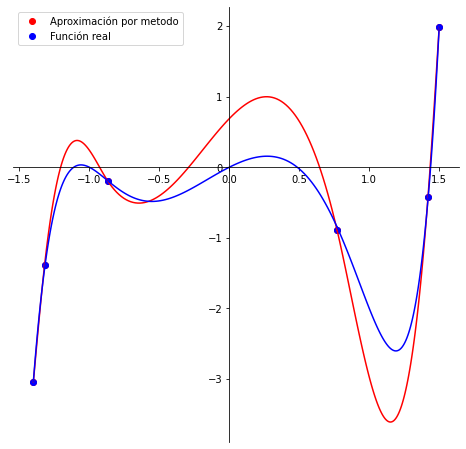

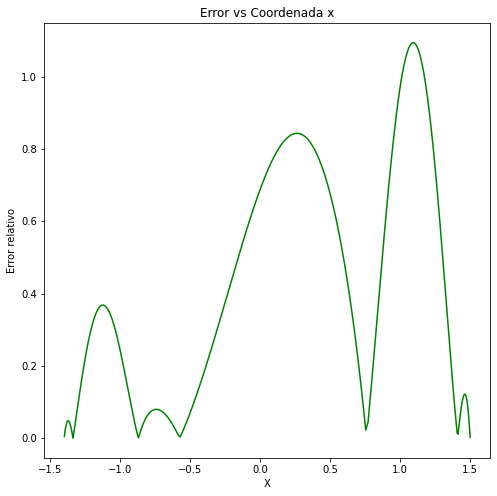

El maximo error relativo es  1.093635774670386
